# Importing needed packages and data

In [3]:
!pip install rfpimp
!pip install plotly

     |████████████████████████████████| 153kB 3.3MB/s 
  Created wheel for rfpimp: filename=rfpimp-1.3.5-cp36-none-any.whl size=10260 sha256=58f840b86c6b543ded5cd8e4753afb6d7370ad02a4b4d7cb45fd1fc55fb7eb38
  Stored in directory: /root/.cache/pip/wheels/2a/c8/bf/80f91224be00870f84a85aa1782cf6cd62c1289a173b66b8e9
  Created wheel for stratx: filename=stratx-0.3-cp36-none-any.whl size=22699 sha256=55f5194a722380652edc00ba1bc43e471d39c37f372cf414aa2c343b3e285652
  Stored in directory: /root/.cache/pip/wheels/91/3b/c3/9dcafed446985efb9008de84b720ddf003ac963e6807e8ad15
Successfully built rfpimp stratx


In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from  sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from  sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import model_selection

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

import random

In [3]:
import rfpimp

C:\Users\gabi9\AppData\Local\Continuum\anaconda3\envs\test\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning:

The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.



In [2]:
df = pd.read_csv("GrandMaster_Ranked_Games.csv")

# Exploratory data analysis

Checking how many rows and columns does the data have.

In [8]:
df.shape

(65896, 50)

Checking the names of the columns.

In [9]:
df.columns

Index(['gameId', 'gameDuraton', 'blueWins', 'blueFirstBlood', 'blueFirstTower',
       'blueFirstBaron', 'blueFirstDragon', 'blueFirstInhibitor',
       'blueDragonKills', 'blueBaronKills', 'blueTowerKills',
       'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills',
       'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
       'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel',
       'blueJungleMinionKills', 'blueKillingSpree', 'blueTotalHeal',
       'blueObjectDamageDealt', 'redWins', 'redFirstBlood', 'redFirstTower',
       'redFirstBaron', 'redFirstDragon', 'redFirstInhibitor',
       'redDragonKills', 'redBaronKills', 'redTowerKills', 'redInhibitorKills',
       'redWardPlaced', 'redWardkills', 'redKills', 'redDeath', 'redAssist',
       'redChampionDamageDealt', 'redTotalGold', 'redTotalMinionKills',
       'redTotalLevel', 'redAvgLevel', 'redJungleMinionKills',
       'redKillingSpree', 'redTotalHeal', 'redObjectDamageDealt'],
    

Seeing how our data looks like.

In [10]:
df.head()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4241678498,2098,0,0,0,1,1,0,1,1,2,0,129,39,26,36,45,101607,63447,774,80,16.0,226,3,24718,31019,1,1,1,0,0,0,3,1,6,0,96,56,36,26,72,125866,70528,832,84,16.8,205,9,65312,88202
1,4233222221,1686,0,0,1,0,0,0,0,0,2,0,72,26,16,31,30,70270,47107,601,65,13.0,136,5,20503,31788,1,1,0,1,1,1,4,1,7,1,72,29,31,16,59,78424,58032,640,73,14.6,214,5,31415,61040
2,4233113995,1588,1,1,1,1,0,1,2,1,10,2,79,39,36,20,88,102449,59163,613,71,14.2,157,7,28612,67404,0,0,0,0,1,0,2,0,1,0,76,28,20,36,30,62134,47408,608,63,12.6,133,5,27846,32107
3,4229230455,1126,1,0,1,0,1,0,1,0,4,0,43,20,20,11,34,56652,39014,486,57,11.4,115,5,17630,37483,0,1,0,0,0,0,0,0,1,0,47,19,11,20,13,32999,32064,461,53,10.6,92,3,23511,10775
4,4228244819,1262,1,0,0,0,1,1,3,0,7,1,49,16,21,7,38,57342,42933,509,61,12.2,129,4,13040,48691,0,1,1,0,0,0,0,0,3,0,43,17,7,21,5,35272,35372,506,54,10.8,113,2,17891,24158


Checking for null values.

In [11]:
df.isna().sum()

gameId                     0
gameDuraton                0
blueWins                   0
blueFirstBlood             0
blueFirstTower             0
blueFirstBaron             0
blueFirstDragon            0
blueFirstInhibitor         0
blueDragonKills            0
blueBaronKills             0
blueTowerKills             0
blueInhibitorKills         0
blueWardPlaced             0
blueWardkills              0
blueKills                  0
blueDeath                  0
blueAssist                 0
blueChampionDamageDealt    0
blueTotalGold              0
blueTotalMinionKills       0
blueTotalLevel             0
blueAvgLevel               0
blueJungleMinionKills      0
blueKillingSpree           0
blueTotalHeal              0
blueObjectDamageDealt      0
redWins                    0
redFirstBlood              0
redFirstTower              0
redFirstBaron              0
redFirstDragon             0
redFirstInhibitor          0
redDragonKills             0
redBaronKills              0
redTowerKills 

## Exploring the data through graphs

How much do the games last?

In [12]:
px.histogram(df, x="gameDuraton", title="Distribution of game duration in seconds")

How much does each team win?

In [13]:
df_winning = pd.DataFrame([['blueTeam', df.blueWins.sum()], ['redTeam', df.redWins.sum()]], columns = ['team', 'winner']) 
px.bar(df_winning, x="winner", y="team", color="team", orientation="h")

In [14]:
px.pie(df_winning, values='winner', names='team', color="team", title='Win percentage by team')

What are the killing sprees by each team?

In [15]:
px.histogram(df, x="blueKillingSpree", title="Blue killing spree")

In [19]:
px.histogram(df, x="redKillingSpree", title="Red killing spree", color_discrete_sequence=['indianred'])

In [22]:
team1 = df[['blueKillingSpree']].copy()
team1['Team'] = 'Blue'
team2 = df[['redKillingSpree']].copy()
team2['Team'] = 'Red'
team1 = team1.rename(columns={"blueKillingSpree": "killingSpree"})
team2 = team2.rename(columns={"redKillingSpree": "killingSpree"})
both_teams = pd.concat([team1, team2])
px.histogram(both_teams, x="killingSpree", color="Team", title="Killing spree for each team")

What is the kill/death ratio for each team?

In [35]:
KD_ratio_blue = df.blueKills.sum()/df.blueDeath.sum()
KD_ratio_blue

1.0009334390824234

In [30]:
df_KD_blue = pd.DataFrame([['kill', df.blueKills.sum()], ['death', df.blueDeath.sum()]], columns = ['ratio', 'number']) 
px.bar(df_KD_blue, x="ratio", y="number", orientation="v")

In [34]:
KD_ratio_red = df.redKills.sum()/df.redDeath.sum()
KD_ratio_red

0.9921540946501932

In [31]:
df_KD_red = pd.DataFrame([['kill', df.redKills.sum()], ['death', df.redDeath.sum()]], columns = ['ratio', 'number']) 
px.bar(df_KD_red, x="ratio", y="number", color_discrete_sequence=['indianred'], orientation="v")

Checking the correlation between all columns. This can help us to decide which columns we can drop/leep for the machine learning model.

In [23]:
corr_matrix = df.corr()
fig = go.Figure(data=go.Heatmap(x=corr_matrix.columns, y=corr_matrix.columns, z=corr_matrix))
fig.show()

Since we want to predict "RedWins" column, on this graph we can see that the correlation between "RedWins" and "BlueWins" is -1 (one excludes another), so we know we can drop "BlueWins" while preparing data for our machine learning model.

# Building machine learning model

## Preparing the data

Checking for categorial data.

In [36]:
df.select_dtypes(exclude=["number"])

""
0
1
2
3
4
...
65891
65892
65893
65894


Dropping the "blueWins" since its correlation with "redWins" (which we want to predict) is -1.

In [0]:
df = df.drop("blueWins", axis=1)

In [38]:
df.shape

(65896, 49)

## Split input and output

In [0]:
X = df.loc[:, df.columns != 'redWins']

In [0]:
y = df["redWins"]

## Decision Tree Classifier

In [0]:
model=DecisionTreeClassifier()

In [42]:
model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

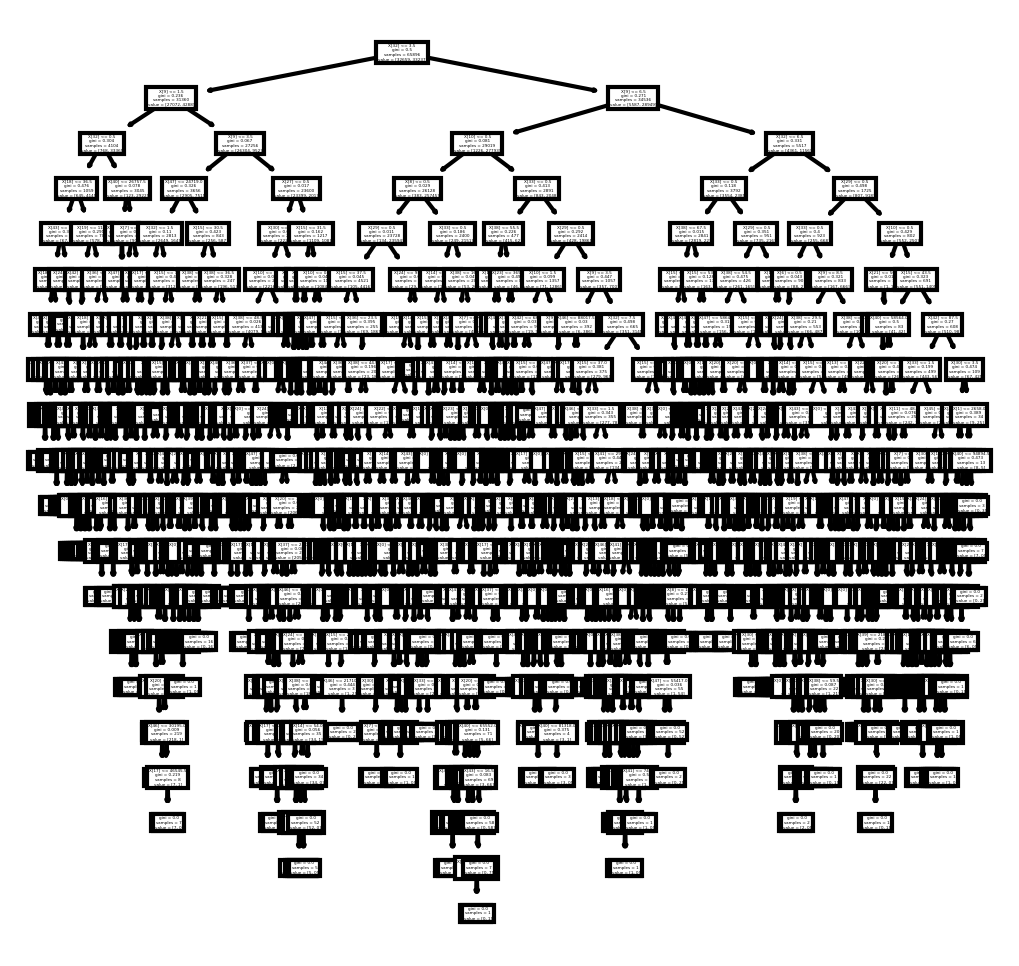

In [43]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model)
fig.savefig('tree.png')

In [44]:
model.score(X,y)

1.0

### Train/Test split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [46]:
model=DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Evaluation

In [0]:
y_pred = model.predict(X_test)

In [48]:
accuracy_score(y_test, y_pred)

0.9770992366412213

In [49]:
precision_score(y_test, y_pred)

0.9789888980640425

In [50]:
recall_score(y_test, y_pred)

0.9754090867538167

In [51]:
f1_score(y_test, y_pred)

0.9771957138932137

Our model is pretty accurate because we have factors which combined can strongly assume the score of the game (number of kills/deaths for each teams, first blood/tower, total number of towers killed, etc).

## Random Forest Classifier

In [0]:
rfc = RandomForestClassifier()
rfc_scores = cross_validate(rfc, X, y.values.ravel(), cv=3, scoring=('accuracy', 'average_precision', 'recall','f1'))

In [0]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

### Evaluation

In [54]:
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred)
recall_score(y_test, y_pred)
f1_score(y_test, y_pred)

0.9887475985728661

In [55]:
rfc_scores

{'fit_time': array([9.6318574, 9.5181706, 9.6388948]),
 'score_time': array([0.50659537, 0.50250697, 0.50784588]),
 'test_accuracy': array([0.99053082, 0.98875484, 0.98647849]),
 'test_average_precision': array([0.99946557, 0.99910726, 0.99912626]),
 'test_f1': array([0.99060778, 0.98885329, 0.98660291]),
 'test_recall': array([0.99007131, 0.98889791, 0.9870927 ])}